In [1]:
import pretty_midi as pm
import IPython.display
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
import time

In [2]:
midi_song = pm.PrettyMIDI("lmd_matched\A\A\A\TRAAAGR128F425B14B\\b97c529ab9ef783a849b896816001748.mid")
piano_roll = midi_song.get_piano_roll()
chroma = midi_song.get_chroma()
print("piano_roll shape: {}".format(piano_roll.shape))
print("chroma shape: {}".format(chroma.shape))

piano_roll shape: (128, 22814)
chroma shape: (12, 22814)


In [3]:
for inst in midi_data.instruments:
    print(pm.program_to_instrument_name(inst.program), "|", inst.program, "|", inst.name)

Shamisen | 106 | TOUCHINT
Electric Guitar (muted) | 28 | TOUCHINT
Acoustic Guitar (nylon) | 24 | TOUCHINT
Pan Flute | 75 | TOUCHINT
Kalimba | 108 | TOUCHINT
Pad 3 (polysynth) | 90 | TOUCHINT
Synth Bass 2 | 39 | TOUCHINT
Lead 8 (bass + lead) | 87 | TOUCHINT
String Ensemble 2 | 49 | TOUCHINT
Harmonica | 22 | TOUCHINT
Melodic Tom | 117 | TOUCHINT
Percussive Organ | 17 | TOUCHINT
Synth Brass 2 | 63 | TOUCHINT
Choir Aahs | 52 | TOUCHINT
Acoustic Grand Piano | 0 | TOUCHINT
Synth Brass 1 | 62 | TOUCHINT


C:\Users\benja\AppData\Roaming\Python\Python39\site-packages\librosa\display.py:1335: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  warnings.warn(


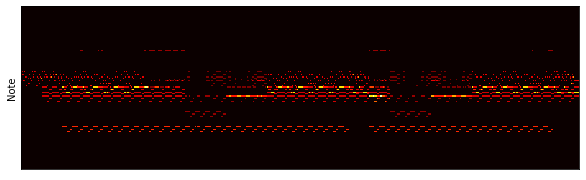

In [22]:
plt.figure(figsize=(10, 3))
librosa.display.specshow(piano_roll, y_axis='cqt_note', cmap=plt.cm.hot)

In [3]:
midi_song = pretty_midi.PrettyMIDI('lmd_matched/A/A/A/TRAAAGR128F425B14B/1d9d16a9da90c090809c153754823c2b.mid')

In [4]:
for instrument in midi_song.instruments:
    print(instrument)

Instrument(program=62, is_drum=False, name="main synth          ")
Instrument(program=62, is_drum=False, name="echo synth          ")
Instrument(program=48, is_drum=False, name="main strings h      ")
Instrument(program=48, is_drum=False, name="main strings m      ")
Instrument(program=48, is_drum=False, name="main strings l      ")
Instrument(program=33, is_drum=False, name="main bass           ")
Instrument(program=0, is_drum=True, name="drums + fills       ")
Instrument(program=14, is_drum=False, name="xtras               ")
Instrument(program=6, is_drum=False, name="harpsichord         ")
Instrument(program=19, is_drum=False, name="verse vibe h        ")
Instrument(program=19, is_drum=False, name="verse vibe m        ")
Instrument(program=19, is_drum=False, name="verse vibe l        ")
Instrument(program=1, is_drum=False, name="verse piano         ")
Instrument(program=64, is_drum=False, name="verse xtra          ")
Instrument(program=48, is_drum=False, name="end string h        ")

In [2]:
path = "lmd_matched"

files = []

for r, d, f in os.walk(path):
    for file in f:
        if '.mid' in file:
            files.append(os.path.join(r, file))
print(len(files))

116189


In [3]:
midi_data = []
i = 0

startTime = time.time()

for file in files:
    if i >= 100: break
    try:
        midi_data.append(pm.PrettyMIDI(file))
        i += 1
    except:
        print(file)

endTime = time.time()
print("Finished in {} seconds.".format(endTime - startTime))

C:\Users\benja\AppData\Roaming\Python\Python39\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
lmd_matched\A\A\M\TRAAMBM128F4248306\1d2b92aa9e454280cca21fae99ebce8e.mid
lmd_matched\A\A\M\TRAAMBM128F4248306\cfdc20d17d7ae95f3493dbf1c3177148.mid
Finished in 16.602978229522705 seconds.


In [23]:
guitars = []
drums = []
bass = []
piano = []
vocal = []
lead = []
rest = []

for song in midi_data:
    for inst in song.instruments:
        inst_name = pm.program_to_instrument_name(inst.program)
        track_name = inst.name
        is_drum = inst.is_drum
        if is_drum:
            drums.append([inst_name, track_name])
        elif "lead" in inst_name.lower():
            lead.append([inst_name, track_name])
        elif "bass" in inst_name.lower():
            bass.append([inst_name, track_name])
        elif "guit" in inst_name.lower():
            guitars.append([inst_name, track_name])
        elif "pian" in inst_name.lower():
            piano.append([inst_name, track_name])
        elif "organ" in inst_name.lower():
            piano.append([inst_name, track_name])]        elif "voc" in inst_name.lower():
            vocal.append([inst_name, track_name]) 
        elif "choi" in inst_name.lower():
            vocal.append([inst_name, track_name])
        elif "voc" in inst.name.lower():
            vocal.append([inst_name, track_name])
        elif "voi" in inst_name.lower():
            vocal.append([inst_name, track_name])
        elif "voi" in inst.name.lower():
            vocal.append([inst_name, track_name])
        else:
            rest.append([inst_name, track_name])

print(len(guitars), len(drums), len(bass), len(piano), len(lead), len(vocal), len(rest))

for n in rest:
    print(n[0], "|", n[1])

209 163 100 137 18 51 268
Synth Brass 1 | main synth          
Synth Brass 1 | echo synth          
String Ensemble 1 | main strings h      
String Ensemble 1 | main strings m      
String Ensemble 1 | main strings l      
Tubular Bells | xtras               
Harpsichord | harpsichord         
Soprano Sax | verse xtra          
String Ensemble 1 | end string h        
Orchestra Hit | orchestra hit       
Flute | 
Brass Section | 
Alto Sax | 
Marimba | 
Harpsichord | 
Synth Strings 1 | 
Accordion | 
Alto Sax | 
Shamisen | TOUCHINT
Pan Flute | TOUCHINT
Kalimba | TOUCHINT
Pad 3 (polysynth) | TOUCHINT
String Ensemble 2 | TOUCHINT
Harmonica | TOUCHINT
Melodic Tom | TOUCHINT
Synth Brass 2 | TOUCHINT
Synth Brass 1 | TOUCHINT
Kalimba | 4
Alto Sax | 3
FX 1 (rain) | 7
Pad 3 (polysynth) | POLYSYNTH
Pad 8 (sweep) | SWEEP PAD
Clavinet | 
Pad 3 (polysynth) | 
Pad 8 (sweep) | 
Pad 3 (polysynth) | 
Pizzicato Strings | Pizzacato
Brass Section | Brass
Tenor Sax | Sax
Synth Strings 2 | SynStr
Pad 3 (poly

In [5]:
names = []
num_inst = 0
for data in midi_data:
    for instrument in data.instruments:
        num_inst += 1
        if instrument.name not in names:
            names.append(instrument.name)

In [6]:
print(num_inst, len(names)) 


946 278


In [20]:
res = [i for i in names if "voc" in i]
res2 = [i for i in names if "voc" in i]
for i in range(len(res)):
    if res[i] not in res2:
        print(res[i])
print(len(res), len(res2))
print(res)

0 0
[]


In [4]:
print(len(midi_data))

101
